# COGS 108 - Final Project
## Group 067

### Names

- Darwin Lee; github: snaivy
- Yu-Sen Wang; github: Yu-Sen-Wang
- Shoumil Sarkar; github: ShoumilSarkar
- Irene Lue; github: irenelue

### Group Members IDs

- A15730835
- A14910881
- A15306683
- A15754235

## Introduction & Background

### Overview

World of Warcraft (WoW) is a MMORPG (massively multiplayer online role-playing game) created by Blizzard Entertainment. In this context, we wil be focusing on the player versus player (PvP) aspect of the game. 

We are interested in determining if having more healers on a team during a battleground increases the chances of that team winning said battleground. Healers take on a support role and mend fellow teammates to help them win the battleground. Due to World of Warcraft's matchmaking system, sometimes there is an imbalance of roles on a certain team, where one team may have 0-1 healers and the opposing side would have 2+ healers. This is a sentiment felt the community and often echoed in battleground chat when playing battlegrounds. We wanted to find out if this is backed by data or if it just feels like more healers on one side increases their chances of winning the battleground.

### Background & Prior Work

The data found for World of Warcraft battlegrounds is player data collected from March 2017 - January 2018. It comes from the score screen displayed at the end of each battleground match is completed. The author here added a few extra columns to include statistics on things he thought would be of importance. The data is all from one person. 

Information we currently have are trends and things that are commonly commented within the World of Warcraft community whether it be through world of mouth, friends, online fourms, in-game world chat, etc.. We want to attempt and see if said trends are hearsay felt by the community or if there is actual data that supports what people are feeling and supposedly seeing. 

References:
1. https://www.kaggle.com/cblesa/world-of-warcraft-battlegrounds/data
2. https://us.forums.blizzard.com/en/wow/t/healer-ratio-imbalance/193266
3. https://us.battle.net/forums/en/wow/topic/11987848986?page=1

### Research Question

Does having more healers on one team compared to the other increase the chance of winning the battelground?

### Hypothesis 

From this project we want to explore if having more healers on one faction versus the other in battlegrounds can increase your chances of winning. 

We think that if there is a bonus event, there will be an increase of players and that might allow for the ratios of healer on both teams to be more balanced. But during non-event times, we think that the side with more healers does have a greater chance of winning. 

## Dataset(s)
- Dataset Name: World of Warcraft Battlegrounds 
- Link to the dataset: https://www.kaggle.com/cblesa/world-of-warcraft-battlegrounds/data
- Number of observations: 52,164
- This is a dataset about World of Warcraft Battlegrounds. The data comes from a score screen displayed at the end of each battleground match. The data was recorded by a single after every battleground they finished. 


### Setup

In [52]:
# Imports

%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm 
import scipy.stats as stats 
from scipy.stats import ttest_ind, chisquare, normaltest

In [53]:
df = pd.read_csv("wowbgs.csv")

In [54]:
df.head(9)

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
5,WG,WG1,Horde,Druid,4,5,12,31759,6071,531,1.0,NaN,dps,NaN
6,WG,WG1,Horde,Shaman,0,4,18,12933,94587,541,1.0,NaN,heal,NaN
7,WG,WG1,Alliance,Priest,9,5,24,123000,34687,269,NaN,1.0,dps,NaN
8,WG,WG1,Horde,Druid,2,1,9,13900,2438,523,1.0,NaN,dps,NaN


## Data Analysis

### Data Cleaning 

Since this is all from one author, and the data was taken directly from the score screen that appears right after a battleground is completed, not much data cleaning was required at all. 

- We analyzed columns that were important to what we are trying to explore and put those into it's own dataframe.
- Replaced `NaN` values with actual number values, since `NaN` in this case represents false, so we changed all of those values into `0`'s. 
- Renamed certain columns for clarity, as such `dps` to `Damage Dealer` and `heal` to `Healer`. 
- Replaced the `0`'s and `1`'s to `Not Happened` or `Happened` in the _Bonus Event_ column for clarity and easier analysis.

In [55]:
df = df.drop(['Battleground', 'Code', 'KB', 'HK', 'DD', 'Lose'], axis=1)

In [56]:
df

,Faction,Class,D,HD,Honor,Win,Rol,BE
0,Horde,Hunter,3,6641,532,1.0,dps,NaN
1,Horde,Death Knight,3,7106,377,1.0,dps,NaN
2,Alliance,Paladin,1,93879,252,NaN,heal,NaN
3,Alliance,Paladin,2,98599,274,NaN,heal,NaN
4,Alliance,Rogue,3,19629,268,NaN,dps,NaN
...,...,...,...,...,...,...,...,...
3721,Alliance,Druid,1,49511,615,1.0,dps,NaN
3722,Alliance,Monk,4,9057,555,1.0,dps,NaN
3723,Horde,Hunter,5,6837,193,NaN,dps,NaN
3724,Alliance,Death Knight,5,40934,581,1.0,dps,NaN


In [57]:
# NaN in columns 'Win', 'Lose', and 'BE' are set to 0
df.fillna(0, inplace=True)

In [58]:
df

,Faction,Class,D,HD,Honor,Win,Rol,BE
0,Horde,Hunter,3,6641,532,1.0,dps,0.0
1,Horde,Death Knight,3,7106,377,1.0,dps,0.0
2,Alliance,Paladin,1,93879,252,0.0,heal,0.0
3,Alliance,Paladin,2,98599,274,0.0,heal,0.0
4,Alliance,Rogue,3,19629,268,0.0,dps,0.0
...,...,...,...,...,...,...,...,...
3721,Alliance,Druid,1,49511,615,1.0,dps,0.0
3722,Alliance,Monk,4,9057,555,1.0,dps,0.0
3723,Horde,Hunter,5,6837,193,0.0,dps,0.0
3724,Alliance,Death Knight,5,40934,581,1.0,dps,0.0


In [59]:
# Renaming the columns so they make more sense to people who never played World of Warcraft before
df = df.rename(index=str, columns={'Faction': 'Team', 'D': 'Death', 'HD': 'Healing Done', 'Rol': 'Healer/Damage Dealer', 'BE': 'Bonus Event'})

In [60]:
# Reorder the columns so that it's easier for us to see if the healing type role or dps type role affects the win rate a lot
df = df[['Team', 'Class', 'Healer/Damage Dealer', 'Death', 'Healing Done', 'Bonus Event', 'Win', 'Honor']]

In [61]:
df

,Team,Class,Healer/Damage Dealer,Death,Healing Done,Bonus Event,Win,Honor
0,Horde,Hunter,dps,3,6641,0.0,1.0,532
1,Horde,Death Knight,dps,3,7106,0.0,1.0,377
2,Alliance,Paladin,heal,1,93879,0.0,0.0,252
3,Alliance,Paladin,heal,2,98599,0.0,0.0,274
4,Alliance,Rogue,dps,3,19629,0.0,0.0,268
...,...,...,...,...,...,...,...,...
3721,Alliance,Druid,dps,1,49511,0.0,1.0,615
3722,Alliance,Monk,dps,4,9057,0.0,1.0,555
3723,Horde,Hunter,dps,5,6837,0.0,0.0,193
3724,Alliance,Death Knight,dps,5,40934,0.0,1.0,581


#### Standardize the 'Healer/Damage Dealer' columns because people who never played this game before might not know what dps mean

In [62]:
def standardize_role(string):
    
    if "dps" in string:
        output = "Damage Dealer"
    elif "heal" in string:
        output = "Healer"
    
    return output

#### Standardize the 'Bonus Event' column so it's easier to analyze

In [63]:
def standardize_bonus_event(event):
    
    if event == 0.0:
        result = "Not happened"
    elif event == 1.0:
        result = "Happened"
    return result

In [64]:
# Apply the method to the 'Healer/Damage Dealer' column
df["Healer/Damage Dealer"] = df["Healer/Damage Dealer"].apply(standardize_role)
df["Bonus Event"] = df["Bonus Event"].apply(standardize_bonus_event)

In [65]:
df

,Team,Class,Healer/Damage Dealer,Death,Healing Done,Bonus Event,Win,Honor
0,Horde,Hunter,Damage Dealer,3,6641,Not happened,1.0,532
1,Horde,Death Knight,Damage Dealer,3,7106,Not happened,1.0,377
2,Alliance,Paladin,Healer,1,93879,Not happened,0.0,252
3,Alliance,Paladin,Healer,2,98599,Not happened,0.0,274
4,Alliance,Rogue,Damage Dealer,3,19629,Not happened,0.0,268
...,...,...,...,...,...,...,...,...
3721,Alliance,Druid,Damage Dealer,1,49511,Not happened,1.0,615
3722,Alliance,Monk,Damage Dealer,4,9057,Not happened,1.0,555
3723,Horde,Hunter,Damage Dealer,5,6837,Not happened,0.0,193
3724,Alliance,Death Knight,Damage Dealer,5,40934,Not happened,1.0,581


### Data Visualization

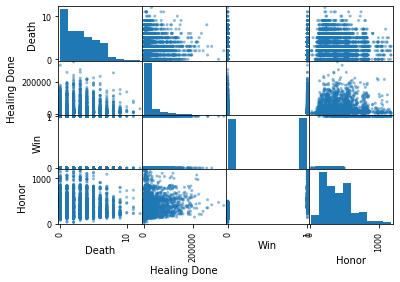

In [66]:
fig = pd.plotting.scatter_matrix(df)

[Text(0, 0.5, 'Number of Clases'), Text(0.5, 0, 'Type of Class')]

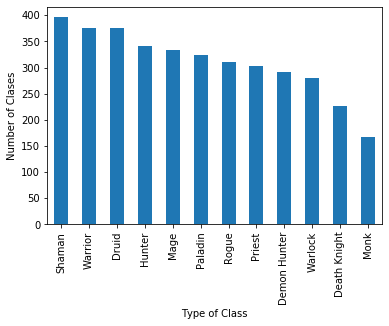

In [67]:
classPlot = df['Class'].value_counts().plot.bar()
classPlot.set(xlabel="Type of Class", ylabel="Number of Clases")

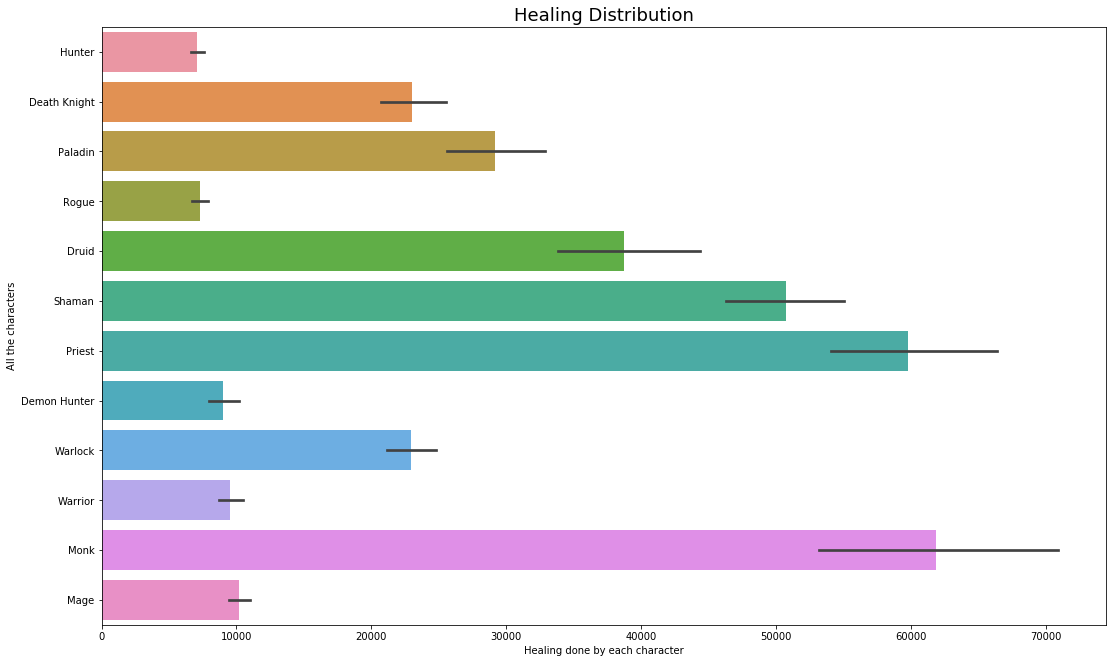

In [68]:
# Use a barchart to demonstrate the Healing Done of different classes
df['Healing Done'] = df['Healing Done'].astype('int64')
f,ax = plt.subplots(figsize=(18,11))
sns.barplot(x='Healing Done',y='Class',data=df,lw =2.5);
ax.set(ylabel='All the characters', xlabel= 'Healing done by each character',);
plt.title('Healing Distribution',fontsize=(18));
plt.show()

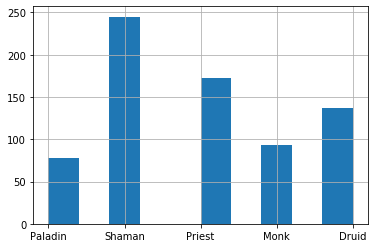

In [69]:
df[df['Healer/Damage Dealer'] == 'Healer']['Class'].hist()
f2 = plt.gcf()

### Data Analysis & Results

Include cells that describe the steps in your data analysis

In [70]:
# Calculate the win rate if one chooses to play a healer role
healer_df = df.loc[df['Healer/Damage Dealer'] == 'Healer']
healer_wins = (healer_df['Win'] == 1.0).sum()
num_of_healer = len(healer_df)
print(healer_df)
print(healer_wins/num_of_healer)
print('Win rate when playing a Healer: %',(healer_wins/num_of_healer)*100)

# Calculate the win rate if one chooses to play a damage dealer role
damage_dealer_df = df.loc[df['Healer/Damage Dealer'] == 'Damage Dealer']
damage_dealer_wins = (damage_dealer_df['Win'] == 1.0).sum()
num_of_damage_dealer = len(damage_dealer_df)
print(damage_dealer_df)
print(damage_dealer_wins/num_of_damage_dealer)
print('Win rate when playing a Damage Dealer: %',(damage_dealer_wins/num_of_damage_dealer)*100)

          Team    Class Healer/Damage Dealer  Death  Healing Done  \
2     Alliance  Paladin               Healer      1         93879   
3     Alliance  Paladin               Healer      2         98599   
6        Horde   Shaman               Healer      4         94587   
9     Alliance   Priest               Healer      1         36734   
12       Horde  Paladin               Healer      1        193000   
...        ...      ...                  ...    ...           ...   
3698  Alliance   Priest               Healer      6        153000   
3704  Alliance    Druid               Healer      2        180000   
3713     Horde   Shaman               Healer      9        124000   
3720  Alliance   Priest               Healer      2        169000   
3725  Alliance     Monk               Healer      5        106000   

       Bonus Event  Win  Honor  
2     Not happened  0.0    252  
3     Not happened  0.0    274  
6     Not happened  1.0    541  
9     Not happened  0.0    276  
12    

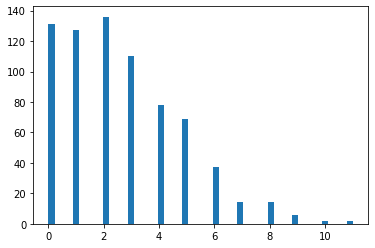

In [71]:
# Get the num of time the player got killed if they chose to be a healer
plt.hist(healer_df['Death'], bins=50)
f1 = plt.gcf()

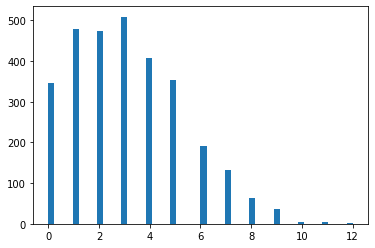

In [72]:
# Get the num of time the player got killed if they chose to be a damage dealer
plt.hist(damage_dealer_df['Death'], bins=50)
f2 = plt.gcf()

In [73]:
#df = df.sort_values(by ='Healing Done' )
#plt.hist(df['Healing Done'], bins=50)
#f3 = plt.gcf()
# df.plot.scatter(x='Healing Done', y='Win');
# healer_df['Death'].value_counts()

Text(0, 0.5, 'Winrate')

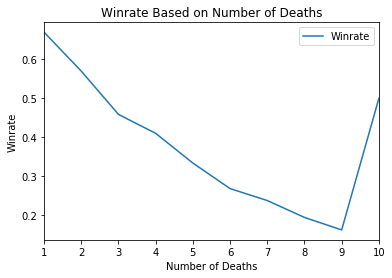

In [74]:
#Winrate as a function of number of deaths
a1Death = df.loc[df['Death'] == 1]
a2Death = df.loc[df['Death'] == 2]
a3Death = df.loc[df['Death'] == 3]
a4Death = df.loc[df['Death'] == 4]
a5Death = df.loc[df['Death'] == 5]
a6Death = df.loc[df['Death'] == 6]
a7Death = df.loc[df['Death'] == 7]
a8Death = df.loc[df['Death'] == 8]
a9Death = df.loc[df['Death'] == 9]
a10Death = df.loc[df['Death'] == 10]

adeathrate1 = a1Death['Win'].mean()
adeathrate2 = a2Death['Win'].mean()
adeathrate3 = a3Death['Win'].mean()
adeathrate4 = a4Death['Win'].mean()
adeathrate5 = a5Death['Win'].mean()
adeathrate6 = a6Death['Win'].mean()
adeathrate7 = a7Death['Win'].mean()
adeathrate8 = a8Death['Win'].mean()
adeathrate9 = a9Death['Win'].mean()
adeathrate10 = a10Death['Win'].mean()

all_death_winrate = {'Number of Deaths':[1,2,3,4,5,6,7,8,9,10], 'Winrate':[adeathrate1,adeathrate2,adeathrate3,adeathrate4,adeathrate5,adeathrate6,adeathrate7,adeathrate8,adeathrate9,adeathrate10]}
adwf = pd.DataFrame(all_death_winrate)
adwf.plot(x='Number of Deaths', y='Winrate');
plt.title('Winrate Based on Number of Deaths')
plt.ylabel('Winrate')

Text(0, 0.5, 'Winrate')

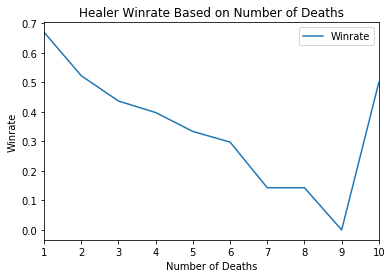

In [75]:
#Healer Winrate
healer1Death = healer_df.loc[healer_df['Death'] == 1]
healer2Death = healer_df.loc[healer_df['Death'] == 2]
healer3Death = healer_df.loc[healer_df['Death'] == 3]
healer4Death = healer_df.loc[healer_df['Death'] == 4]
healer5Death = healer_df.loc[healer_df['Death'] == 5]
healer6Death = healer_df.loc[healer_df['Death'] == 6]
healer7Death = healer_df.loc[healer_df['Death'] == 7]
healer8Death = healer_df.loc[healer_df['Death'] == 8]
healer9Death = healer_df.loc[healer_df['Death'] == 9]
healer10Death = healer_df.loc[healer_df['Death'] == 10]

hdeathrate1 = healer1Death['Win'].mean()
hdeathrate2 = healer2Death['Win'].mean()
hdeathrate3 = healer3Death['Win'].mean()
hdeathrate4 = healer4Death['Win'].mean()
hdeathrate5 = healer5Death['Win'].mean()
hdeathrate6 = healer6Death['Win'].mean()
hdeathrate7 = healer7Death['Win'].mean()
hdeathrate8 = healer8Death['Win'].mean()
hdeathrate9 = healer9Death['Win'].mean()
hdeathrate10 = healer10Death['Win'].mean()

healer_death_winrate = {'Number of Deaths':[1,2,3,4,5,6,7,8,9,10], 'Winrate':[hdeathrate1,hdeathrate2,hdeathrate3,hdeathrate4,hdeathrate5,hdeathrate6,hdeathrate7,hdeathrate8,hdeathrate9,hdeathrate10]}
hdwf = pd.DataFrame(healer_death_winrate)
hdwf.plot(x='Number of Deaths', y='Winrate');
plt.title('Healer Winrate Based on Number of Deaths')
plt.ylabel('Winrate')



Text(0, 0.5, 'Winrate')

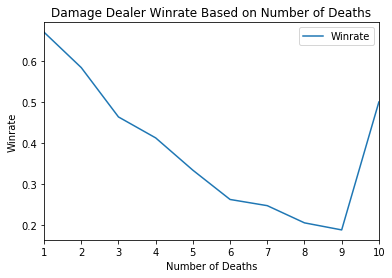

In [76]:
#Dealer Winrate

dealer1Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 1]
dealer2Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 2]
dealer3Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 3]
dealer4Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 4]
dealer5Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 5]
dealer6Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 6]
dealer7Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 7]
dealer8Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 8]
dealer9Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 9]
dealer10Death = damage_dealer_df.loc[damage_dealer_df['Death'] == 10]

ddeathrate1 = dealer1Death['Win'].mean()
ddeathrate2 = dealer2Death['Win'].mean()
ddeathrate3 = dealer3Death['Win'].mean()
ddeathrate4 = dealer4Death['Win'].mean()
ddeathrate5 = dealer5Death['Win'].mean()
ddeathrate6 = dealer6Death['Win'].mean()
ddeathrate7 = dealer7Death['Win'].mean()
ddeathrate8 = dealer8Death['Win'].mean()
ddeathrate9 = dealer9Death['Win'].mean()
ddeathrate10 = dealer10Death['Win'].mean()

dealer_death_winrate = {'Number of Deaths':[1,2,3,4,5,6,7,8,9,10], 'Winrate':[ddeathrate1,ddeathrate2,ddeathrate3,ddeathrate4,ddeathrate5,ddeathrate6,ddeathrate7,ddeathrate8,ddeathrate9,ddeathrate10]}
ddwf = pd.DataFrame(dealer_death_winrate)
ddwf.plot(x='Number of Deaths', y='Winrate');
plt.title('Damage Dealer Winrate Based on Number of Deaths')
plt.ylabel('Winrate')

## Ethics & Privacy

The data in this dataset was collected by the author playing through the battlegrounds himself. The names of the players are anonymized and remain that way. Since this is an online game, there is a high chance that even if the names were not anonymized, it would be an alias of a person instead of that actual person, therefore their identity being compromised would should be little to none. 

The data collected is from March 2017 - January 2018, so the time frame is very small, but all the data comes from the same expansion. Considering this game has been out for about 13 years at this point and battlegrounds has been a game feature half way into the very first iteration of the game. They only changes would be done during major patches or an expansion release. As for location of data, players are chosen randomly from a battleground queue from different servers. 

This result of this project is would be to see if what the community feels is true and backed by data or if it is hearsay. Potential influences could also potentially make it so Blizzard improves the way battlegrounds are played or the matchmaking system currently in the place for battlegrounds to give the disadvantaged side a handicap if the data shows that having more healers on one faction in a battelground increases the win for said faction.

## Conclusion & Discussion

In our research, we aimed to determine whether a team that has more healers is able to increase their winning chances on a battleground. We developed and compared three models containing multiple samples of every character in the game that describes their battleground, code, faction, class, wins and losses. In our first model, we plotted a scatter matrix that is a cumulative representation of our data which has a plot of all of the given data in the dataframe. In our second model, we organized each of the characters by their healing distribution that indicates how much healing they’ve completed. And in our last model, we plotted the number of deaths each character has committed; a healer’s death doesn’t influence their win rate as much as a damage dealer’s win rate. Therefore, healers have more room for error which may explain their higher win rate. Although it’s been generalized frequently that a greater number of healers correlate to a higher chance of winning the game, a few limitations of our analysis include a lack of previous studies in the research area and scope of discussions. With all of our findings, we were able to determine whether or not a greater number of healers on a team is able to increase their chances of winning the game.